In [1]:
# IMPORT STATEMENTS
import cv2
import re
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
import matplotlib.patches as patches
import matplotlib.colors as colors
from matplotlib.transforms import *
import PIL
import math
#get_ipython().magic('matplotlib inline')
import pandas as pd
import seaborn as sns
import json
from scipy.stats import fisher_exact, ttest_ind
from sklearn.linear_model import LinearRegression
from collections import Counter
from pprint import pprint
import os
import pickle
import sys
sys.path.append("/booleanfs2/sahoo/Hegemon/")
sys.path.append("/booleanfs2/sahoo/BoNE")
import bone
import StepMiner as smn
import HegemonUtil as hu
import MACS_utils as mu
from sklearn.metrics import *
acolor = ["#00CC00", "#D8A03D","#EC008C",
          'cyan', "#B741DC", "#808285",
          'blue', 'black', 'green', 'red',
          'orange', 'brown', 'pink', 'purple']

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3

/booleanfs2/sahoo/Hegemon/HegemonUtil.py:175: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if (data[i] is None or data[i] is ""):


Kanth 2016 Polyps (n = 86)
GSE76987 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP9
82 [41, 41] GSE76987 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP9 PLP9
0 [[1, 2, 3], [-3, -2, -1]]
[0, 16, 152, 130, 122, 29, 406, 1530, 775, 33, 25, 9, 36, 516, 153, 188]
[16, 152, 130]
[-3, -2, -1]
[16, 146, 116]
ROC-AUC 0.49
[107.00725322793251, 45.26168067597402, 106.50725322793251, 107.50725322793251]
20.85055974393345 107.00725322793251
1 [[1, 2, 4], [-2, -1, 1]]
[0, 16, 152, 130, 122, 29, 406, 1530, 775, 33, 25, 9, 36, 516, 153, 188]
[16, 152, 122]
[-2, -1, 1]
[16, 146, 105]
ROC-AUC 0.66
[14.246989361425111, 42.42259743353544, 13.746989361425111, 14.746989361425111]
12.521061693562098 14.246989361425111
2 [[2, 3, 4], [-2, -1, 1]]
[0, 16, 152, 130, 122, 29, 406, 1530, 775, 33, 25, 9, 36, 516, 153, 188]
[152, 130, 122]
[-2, -1, 1]
[146, 116, 105]
ROC-AUC 0.58
[42.91898881507765, 40.26428307950797, 42.41898881507765, 43.41898881507765]
24.553548126379365 42.9189888150776

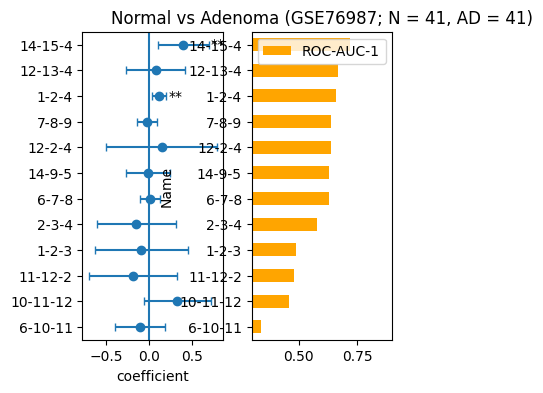

In [12]:
reload(bone)
reload(mu)
ana = mu.PolypAnalysis()
ana.getKanth2016(3)

opts = [[[1, 2, 3], [-3, -2, -1]],
        [[1, 2, 4], [-2, -1, 1]],
        [[2, 3, 4], [-2, -1, 1]],

        [[12, 2, 4], [-2, -1, 1]],
        [[12, 13, 4], [-1, 1, 2]],
        [[11, 12, 2], [-3, -2, -1]],
        [[10, 11, 12], [-3, -2, -1]],
        [[6, 10, 11], [-3, -2, -1]],
        [[6, 7, 8], [-1, 1, 2]],
        [[7, 8, 9], [1, 2, 3]],
        [[14, 15, 4], [-1, 1, 2]],
        [[14, 9, 5], [-1, 1, 2]]
       ]
#opts = [[[i], [1]] for i in range(1, len(ng))]

res = []
for i in range(len(opts)):
    print(i, opts[i])
    genes, wt1, l1 = mu.getGeneGroups2(opts[i][0], opts[i][1], 0)
    c_dict, fpr, tpr, roc_auc = bone.processGeneGroups(ana, l1, wt1)
    res += [[c_dict, fpr, tpr, roc_auc]]

actual = [1 if ana.aval[i] >= 1 else 0 for i in ana.i1]
data_list = { 'y': actual }
for i in range(len(opts)):
    id1 = 'c' + str(i)
    c = [res[i][0][j] for j in ana.i1]
    data_list[id1] = c
df1 = pd.DataFrame(data_list)
df2 = df1.copy()
df2['c1'] = 4 * df2['c1']
df2['c3'] = 0.5 * df2['c3']
df2['c8'] = 4 * df2['c8']
df2['c9'] = 4 * df2['c9']
df2 = bone.printOLS('y ~ c0 + c1 + c2 + c3 + c4 + c5 + c6 + c7 + c8 + c9 + c10 + c11', df2)
#df2 = bone.printOLS('y ~ c1 + c3 + c9', df1)
#df2 = bone.printOLS('y ~ c1 + c3 + c9', df1)
df = df2
df = df.drop(['Intercept'])
df["Name"] = ["-".join([str(i) for i in o[0]]) for o in opts]
df['ROC-AUC-1'] = [0.49, 0.66, 0.58, 0.64, 0.67, 0.48,
                    0.46, 0.34, 0.63, 0.64, 0.72, 0.63]
df = df.sort_values(by="ROC-AUC-1", ascending=1)
fig = plt.figure(figsize=(4,4), dpi=100)
ax = plt.subplot2grid((1, 2), (0, 0))
ax.errorbar(df["coeff"], range(len(df.index)), yerr=0,
        xerr=[list(df["coeff"] - df["lower 0.95"]),
            list(df["upper 0.95"] - df["coeff"])], fmt='o', capsize=3)
#df.plot.barh(x='Name', y='ROC-AUC-1', color='orange', ax=ax)
ax.set_yticks(range(len(df.index)))
ax.set_yticklabels(df["Name"])
ax.set_xlabel("coefficient")
ax.axvline(x=0)
#ax.set_xlim([0, 5.5])
ax.set_ylim([-0.5, len(df.index) - 0.5])
for i in range(len(df.index)):
    ax.text(df["upper 0.95"][i] + 0.02,i, df['codes'][i],
            verticalalignment='center')
ax = plt.subplot2grid((1, 2), (0, 1))
ax = df.plot.barh(x="Name", y="ROC-AUC-1", color='orange', ax=ax)
ax.set_xlim([0.3, 0.9])
ax.set_title("Normal vs Adenoma (GSE76987; N = 41, AD = 41)")
fig.savefig("results/2F-ml.pdf")

Normal Adenoma Purged Dataset (n = 228)
GEO-Normal-Adenoma http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP33
228 [160, 68] GEO-Normal-Adenoma http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP33 PLP33
0 [[1, 2, 3], [-3, -2, -1]]
[0, 16, 152, 130, 122, 29, 406, 1530, 775, 33, 25, 9, 36, 516, 153, 188]
[16, 152, 130]
[-3, -2, -1]
[16, 152, 130]
ROC-AUC 0.94
[95.85013644988877, 238.38978234087367, 95.35013644988877, 96.35013644988877]
31.708038095531087 95.85013644988877
1 [[1, 2, 4], [-2, -1, 1]]
[0, 16, 152, 130, 122, 29, 406, 1530, 775, 33, 25, 9, 36, 516, 153, 188]
[16, 152, 122]
[-2, -1, 1]
[16, 152, 122]
ROC-AUC 1.00
[21.094021582175277, 292.45127452812295, 20.594021582175277, 21.594021582175277]
19.46434357457131 21.094021582175277
2 [[2, 3, 4], [-2, -1, 1]]
[0, 16, 152, 130, 122, 29, 406, 1530, 775, 33, 25, 9, 36, 516, 153, 188]
[152, 130, 122]
[-2, -1, 1]
[152, 130, 122]
ROC-AUC 0.98
[54.992882030161496, 422.0613624251778, 54.492882030161496, 55.4928820301614

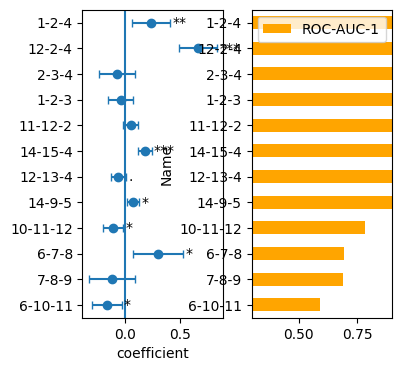

In [17]:
reload(bone)
reload(mu)
ana = mu.PolypAnalysis()
ana.getPooled()

opts = [[[1, 2, 3], [-3, -2, -1]],
        [[1, 2, 4], [-2, -1, 1]],
        [[2, 3, 4], [-2, -1, 1]],

        [[12, 2, 4], [-2, -1, 1]],
        [[12, 13, 4], [-1, 1, 2]],
        [[11, 12, 2], [-3, -2, -1]],
        [[10, 11, 12], [-3, -2, -1]],
        [[6, 10, 11], [-3, -2, -1]],
        [[6, 7, 8], [-1, 1, 2]],
        [[7, 8, 9], [1, 2, 3]],
        [[14, 15, 4], [-1, 1, 2]],
        [[14, 9, 5], [-1, 1, 2]]
       ]
#opts = [[[i], [1]] for i in range(1, len(ng))]

res = []
roc_aucs = []
for i in range(len(opts)):
    print(i, opts[i])
    genes, wt1, l1 = mu.getGeneGroups2(opts[i][0], opts[i][1], 0)
    c_dict, fpr, tpr, roc_auc = bone.processGeneGroups(ana, l1, wt1)
    res += [[c_dict, fpr, tpr, roc_auc]]
    roc_aucs.append(roc_auc)

actual = [1 if ana.aval[i] >= 1 else 0 for i in ana.i1]
data_list = { 'y': actual }
for i in range(len(opts)):
    id1 = 'c' + str(i)
    c = [res[i][0][j] for j in ana.i1]
    data_list[id1] = c
df1 = pd.DataFrame(data_list)
df2 = df1.copy()
# df2['c1'] = 4 * df2['c1']
# df2['c3'] = 0.5 * df2['c3']
# df2['c8'] = 4 * df2['c8']
# df2['c9'] = 4 * df2['c9']
df2 = bone.printOLS('y ~ c0 + c1 + c2 + c3 + c4 + c5 + c6 + c7 + c8 + c9 + c10 + c11', df2)
#df2 = bone.printOLS('y ~ c1 + c3 + c9', df1)
#df2 = bone.printOLS('y ~ c1 + c3 + c9', df1)
df = df2
df = df.drop(['Intercept'])
df["Name"] = ["-".join([str(i) for i in o[0]]) for o in opts]
df['ROC-AUC-1'] = roc_aucs
df = df.sort_values(by="ROC-AUC-1", ascending=1)
fig = plt.figure(figsize=(4,4), dpi=100)
ax = plt.subplot2grid((1, 2), (0, 0))
ax.errorbar(df["coeff"], range(len(df.index)), yerr=0,
        xerr=[list(df["coeff"] - df["lower 0.95"]),
            list(df["upper 0.95"] - df["coeff"])], fmt='o', capsize=3)
#df.plot.barh(x='Name', y='ROC-AUC-1', color='orange', ax=ax)
ax.set_yticks(range(len(df.index)))
ax.set_yticklabels(df["Name"])
ax.set_xlabel("coefficient")
ax.axvline(x=0)
#ax.set_xlim([0, 5.5])
ax.set_ylim([-0.5, len(df.index) - 0.5])
for i in range(len(df.index)):
    ax.text(df["upper 0.95"][i] + 0.02,i, df['codes'][i],
            verticalalignment='center')
ax = plt.subplot2grid((1, 2), (0, 1))
ax = df.plot.barh(x="Name", y="ROC-AUC-1", color='orange', ax=ax)
ax.set_xlim([0.3, 0.9])
#ax.set_title("Normal vs Adenoma (GSE76987; N = 41, AD = 41)")
fig.savefig("results/2F-ml.pdf")

### Expand 1-2-4 to 1-2-3-4-5 and optimize weights

In [11]:
ana = mu.PolypAnalysis()
ana.getKanth2016(3)
order = [1, 2, 3, 4,5]
wt1 = [1, 1, 1, 1,1]
genes, wt1, l1 = mu.getGeneGroups2(order, wt1, 0)
ana.orderData(l1, wt1)
data = [[k[i - ana.h.start] for i in ana.order] for k in ana.ranks]
lr_df = pd.DataFrame(data).T
lr_df.insert(0, 'Sample', [ana.h.headers[i] for i in ana.order])
lr_df['Constant'] = 1
lr_df['y'] = [ana.aval[i] for i in ana.order]
 
X = lr_df.iloc[:,1:-2].to_numpy()
y = lr_df['y'].to_numpy()
 
reg = LinearRegression().fit(X,y)
 
print('\n1-2-3-4-5:', reg.coef_*100)

Kanth 2016 Polyps (n = 86)
GSE76987 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP9
82 [41, 41] GSE76987 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP9 PLP9
[0, 16, 152, 130, 122, 29, 406, 1530, 775, 33, 25, 9, 36, 516, 153, 188]
[16, 152, 130, 122, 29]
[1, 1, 1, 1, 1]
[16, 146, 116, 105, 27]

1-2-3-4-5: [-5.52204454 -0.31050899  0.19439644  2.87138898 -4.03287946]
